In [61]:
import os
import math
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [62]:
care_management = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/care_management_anonymized.csv'

In [63]:
volunteer_services = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/volunteer_services_anonymized.csv'
client_info = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/client_info_anonymized.csv'
donations = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/donations_anonymized.csv'
pantry = r'C:/Users/secan/Documents/DataPhilly Datathon 2022/pantry_anonymized.csv'

In [64]:
care_management_data = pd.read_csv(care_management) #opens the file in read mode

In [65]:
volunteer_services_data = pd.read_csv(volunteer_services) #opens the file in read mode
client_info_data = pd.read_csv(client_info) #opens the file in read mode
donations_data = pd.read_csv(donations) #opens the file in read mode
pantry_data = pd.read_csv(pantry) #opens the file in read mode

In [66]:
care_management_data

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,434,2021-09-13 11:40:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN
12483,502,2021-09-15 09:35:00,"Remote Contact with client (phone, email)",7.0,Minutes,Call,Client,Other Party,NaN,NaN,NaN,NaN,NaN,NaN
12484,30,2021-09-15 10:55:00,"Remote Contact with client (phone, email)",18.0,Minutes,Call,Client,ElderNet,Food,Coordination,NaN,NaN,NaN,NaN
12485,406,2021-09-15 14:05:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN


In [67]:
care_management_data.isna().sum()

anon_ID                    0
assistance_date            0
assistance_category        0
amount                     0
unit                       0
CommType                7819
Party                   7812
InitiatedBy             7842
Benefit_1               8427
Assistance_1            8361
Benefit_2              11896
Assistance_2           11899
Benefit_3              12403
Assistance_3           12404
dtype: int64

In [68]:
care_management_data.shape

(12487, 14)

In [149]:
care_management_data.select_dtypes(include=['object']).columns

Index(['assistance_category', 'unit', 'CommType', 'Party', 'InitiatedBy',
       'Benefit_1', 'Assistance_1', 'Benefit_2', 'Assistance_2', 'Benefit_3',
       'Assistance_3'],
      dtype='object')

In [211]:
care_management_data_grouped_1 = care_management_data.groupby(['anon_ID','assistance_category','unit', 'CommType','Party','InitiatedBy','Benefit_1','Assistance_1','Benefit_2','Assistance_2','Benefit_3','Assistance_3'], dropna=False).sum().reset_index()
care_management_data_grouped_1

,anon_ID,assistance_category,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3,amount,counter
0,1,"Remote Contact with client (phone, email)",Minutes,Call,Client,ElderNet,NaN,Enrollment,Housing,Coordination,NaN,NaN,25.0,1
1,1,"Remote Contact with client (phone, email)",Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
2,2,Community,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
3,2,"Remote Contact with client (phone, email)",Minutes,Call,Client,Eldernet,Eldernet,Coordination,NaN,NaN,NaN,NaN,3.0,1
4,2,"Remote Contact with client (phone, email)",Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,640,"Remote Contact with client (phone, email)",Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,8
4161,641,Remote Contact w/o client,Minutes,Call,Client,ElderNet,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2
4162,641,Remote Contact w/o client,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1
4163,641,"Remote Contact with client (phone, email)",Minutes,Call,Client,ElderNet,NaN,Coordination,NaN,NaN,NaN,NaN,8.0,1


In [202]:
care_management_data_grouped_1['anon_ID'].unique()

array([  1,   2,   3,   5,   7,   8,  11,  12,  13,  14,  15,  16,  17,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  30,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  43,  44,  45,  46,  47,  50,  51,
        52,  53,  56,  57,  58,  59,  60,  61,  62,  63,  64,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  76,  77,  79,  80,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  97,  98,
        99, 101, 102, 103, 104, 105, 106, 107, 108, 111, 113, 114, 115,
       117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130,
       132, 134, 135, 136, 137, 139, 142, 143, 144, 145, 146, 147, 148,
       149, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163,
       164, 165, 167, 168, 169, 170, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 205, 207, 208, 210, 212, 213,
       214, 216, 218, 219, 220, 221, 222, 224, 226, 227, 228, 22

In [205]:
client_info_data['anon_ID'].unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [206]:
care_management_data['anon_ID'].unique().size

490

In [207]:
client_info_data['anon_ID'].unique().size

641

In [208]:
care_management_data_grouped_1['anon_ID'].unique().size

490

In [147]:
care_management_data['Party'].unique()

array([nan, 'Client', 'Service Provider', 'ElderNet', 'Family', 'Other',
       'Social Worker', 'Friend', 'Eldernet', 'Care Coordinator',
       'Care Manager', 'Clinet'], dtype=object)

In [73]:
care_management_data['CommType'].unique()

array([nan, 'Text Message', 'Email', 'Voice Message', 'Call', 'Mail',
       'In Person', 'Video Call', ' '], dtype=object)

In [70]:
care_management_data['Assistance_1'].unique()

array([nan, 'Information', 'Coordination', 'Support', 'Filing',
       'Enrollment', 'Referral', 'Continuation', 'Medical',
       'coordination', 'Facilitation'], dtype=object)

In [71]:
care_management_data['Assistance_2'].unique()

array([nan, 'Coordination', 'Information', 'Referral', 'Support',
       'Enrollment', 'Continuation', 'Filing', 'ElderNet'], dtype=object)

In [69]:
care_management_data['Assistance_3'].unique()

array([nan, 'Support', 'Information', 'Coordination', 'Enrollment',
       'Referral', 'Filing', 'Continuation'], dtype=object)

In [72]:
care_management_data['Benefit_2'].unique()

array([nan, 'ADL', 'Legal', 'Food', 'Medical', 'Financial', 'Safety',
       'ElderNet', 'Housing', 'Utilities', 'Eldernet',
       'Telecommunication', 'Transportation', 'Telecommunications',
       'Social', 'Coordination'], dtype=object)

In [74]:
import seaborn as sns

<AxesSubplot:xlabel='CommType', ylabel='count'>

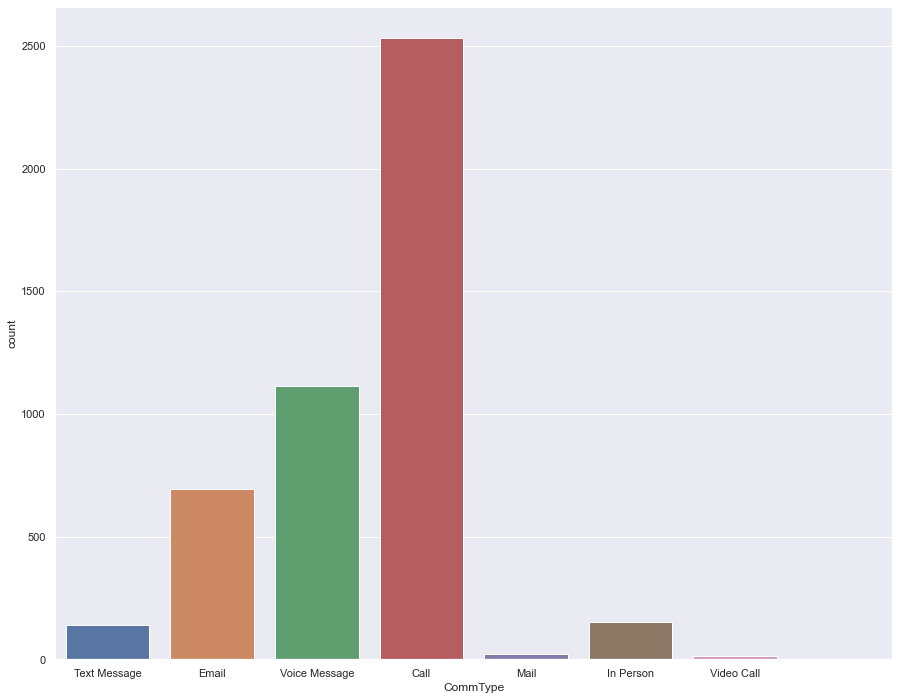

In [75]:
sns.countplot(x='CommType', data = care_management_data)

<AxesSubplot:xlabel='assistance_category', ylabel='count'>

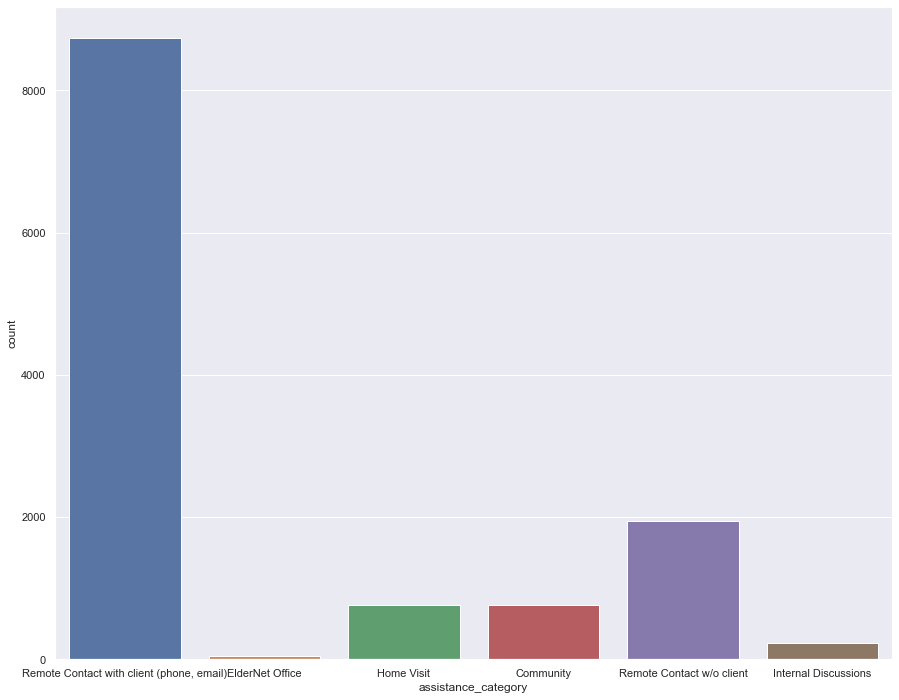

In [112]:
sns.countplot(x='assistance_category', data = care_management_data)

<AxesSubplot:xlabel='Assistance_1', ylabel='count'>

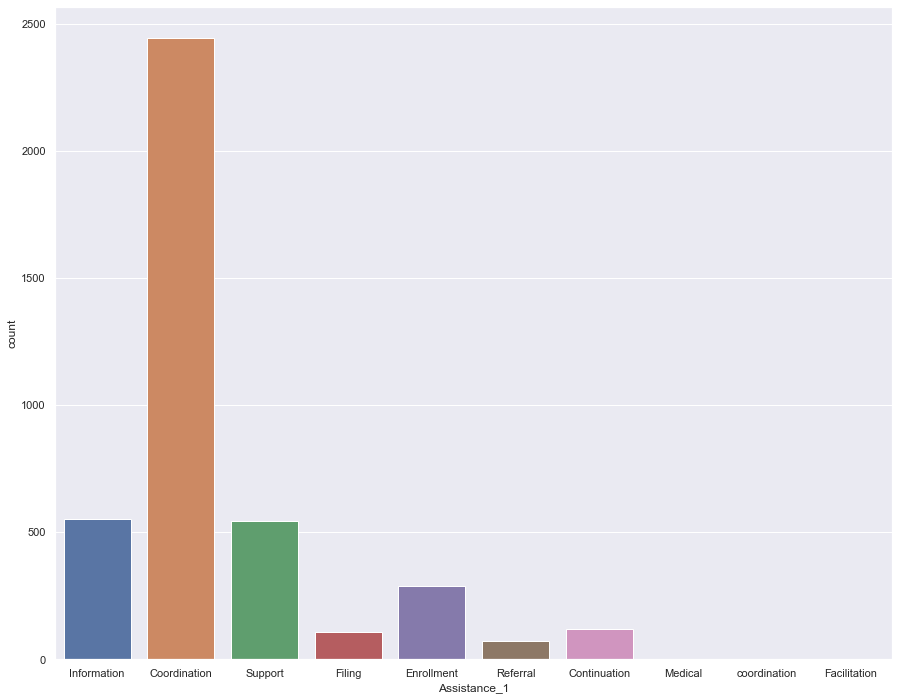

In [113]:
sns.countplot(x='Assistance_1', data = care_management_data)

<AxesSubplot:xlabel='Benefit_1', ylabel='count'>

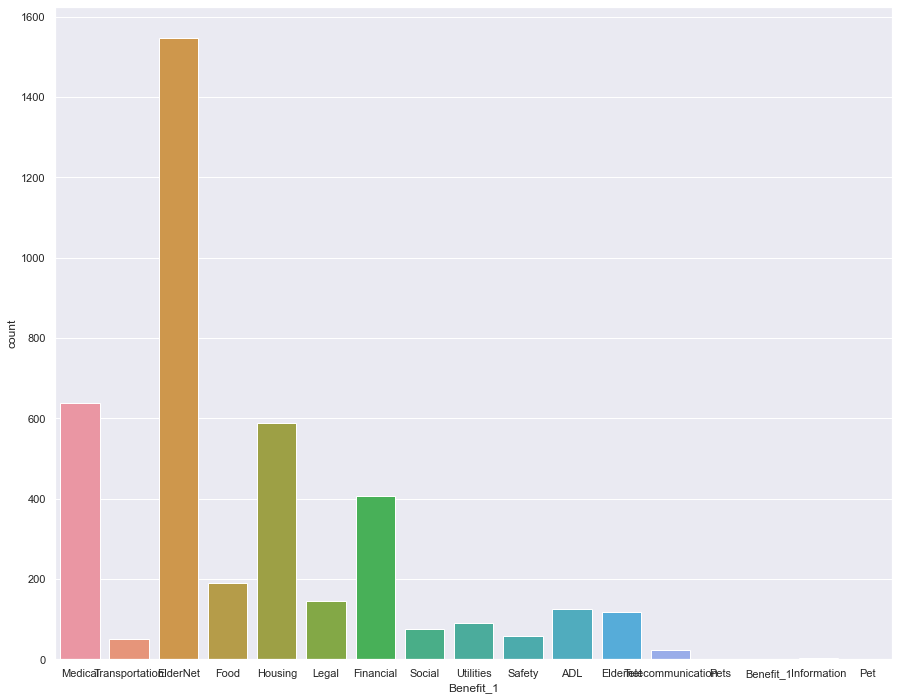

In [114]:
sns.countplot(x='Benefit_1', data = care_management_data)

<AxesSubplot:xlabel='Assistance_2', ylabel='count'>

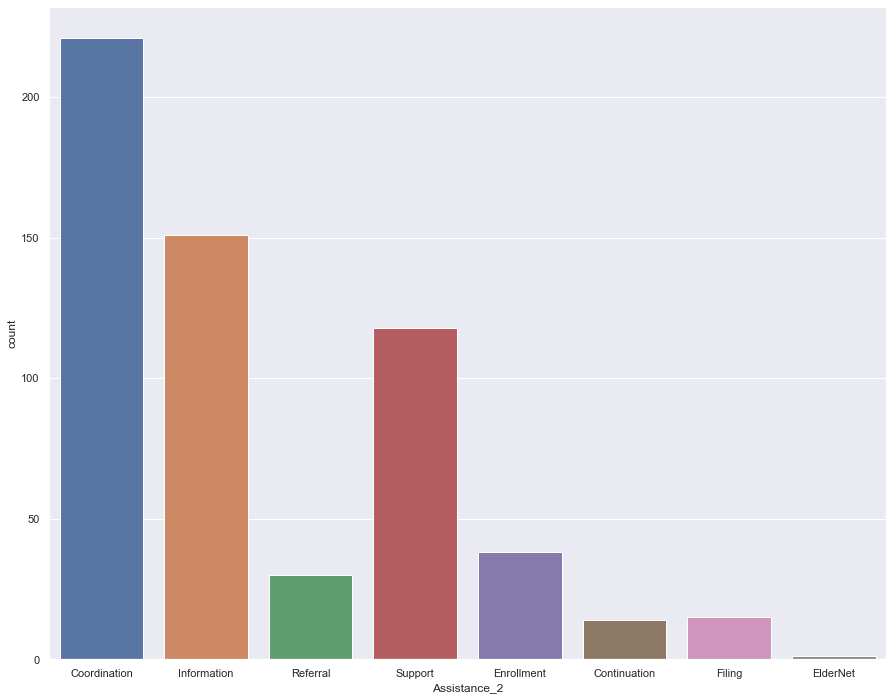

In [116]:
sns.countplot(x='Assistance_2', data = care_management_data)

<AxesSubplot:xlabel='Benefit_2', ylabel='count'>

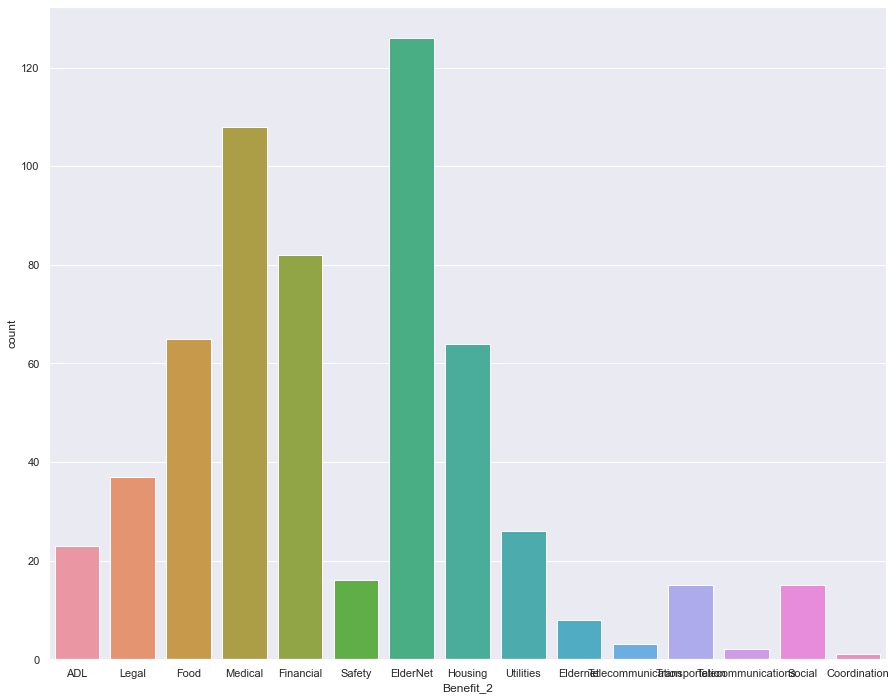

In [115]:
sns.countplot(x='Benefit_2', data = care_management_data)

<AxesSubplot:xlabel='Benefit_3', ylabel='count'>

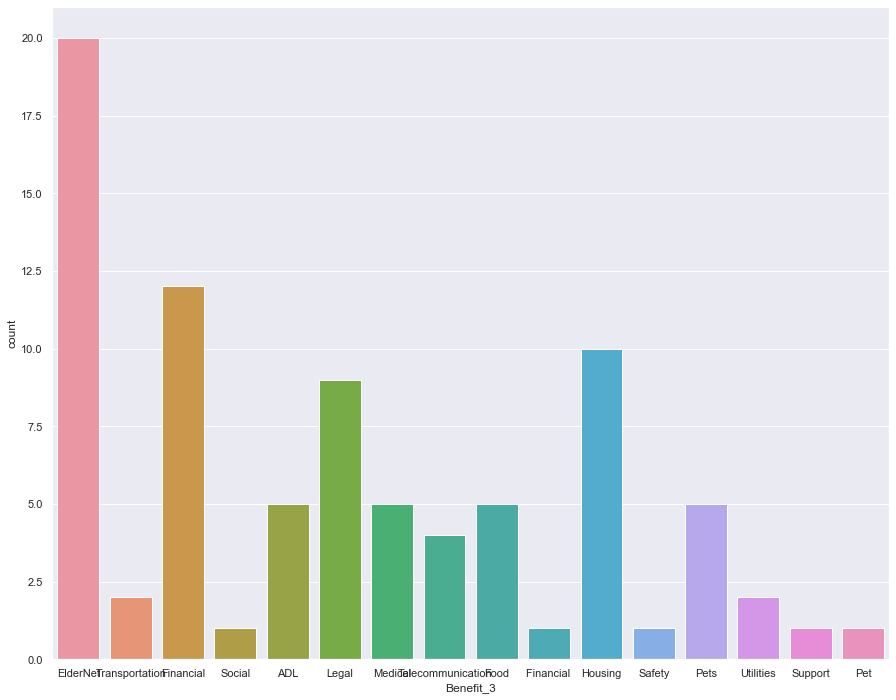

In [117]:
sns.countplot(x='Benefit_3', data = care_management_data)

<AxesSubplot:xlabel='Assistance_3', ylabel='count'>

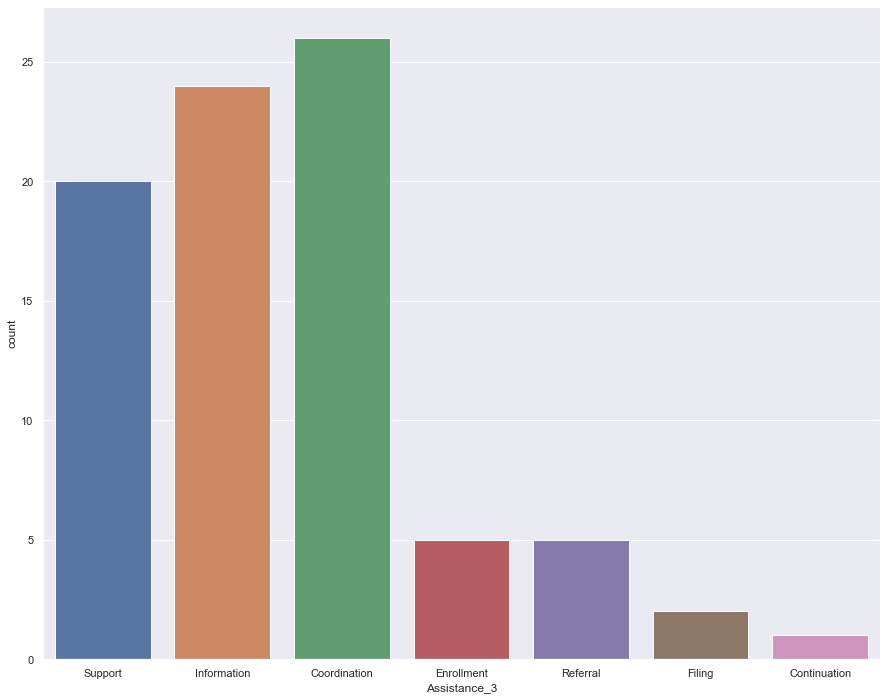

In [118]:
sns.countplot(x='Assistance_3', data = care_management_data)

In [76]:
care_management_data.sort_values(by='amount', ascending = False)

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
2483,168,2019-06-12 13:20:00,Community,183.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614,382,2019-06-20 08:15:00,Community,180.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6735,139,2020-02-26 09:05:00,Home Visit,170.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,626,2019-04-04 13:50:00,Home Visit,170.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12180,127,2021-07-19 09:20:00,Community,160.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,314,2019-09-27 13:25:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8624,168,2020-06-18 12:20:00,Remote Contact w/o client,1.0,Minutes,Voice Message,Social Worker,ElderNet,Medical,Coordination,NaN,NaN,NaN,NaN
8622,588,2020-06-18 12:10:00,Remote Contact w/o client,1.0,Minutes,Email,Family,ElderNet,NaN,NaN,NaN,NaN,NaN,NaN
8620,11,2020-06-18 12:00:00,"Remote Contact with client (phone, email)",1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN


In [80]:
from datetime import datetime
care_management_data['assistance_date'] = datetime.fromisoformat(care_management_data['assistance_date'])

TypeError: fromisoformat: argument must be str

In [91]:
care_management_data.assistance_date = pd.to_datetime(care_management_data.assistance_date, infer_datetime_format=True)  
care_management_data

,anon_ID,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
0,531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,434,2021-09-13 11:40:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN
12483,502,2021-09-15 09:35:00,"Remote Contact with client (phone, email)",7.0,Minutes,Call,Client,Other Party,NaN,NaN,NaN,NaN,NaN,NaN
12484,30,2021-09-15 10:55:00,"Remote Contact with client (phone, email)",18.0,Minutes,Call,Client,ElderNet,Food,Coordination,NaN,NaN,NaN,NaN
12485,406,2021-09-15 14:05:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN


In [96]:
#care_management_data = care_management_data.set_index('assistance_date')
care_management_days = care_management_data.resample('1M')

In [101]:
care_management_data['counter'] = 1
care_management_data

,anon_ID,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3,counter
assistance_date,,,,,,,,,,,,,,
2019-01-01 12:50:00,531,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2019-01-02 07:30:00,531,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2019-01-02 09:50:00,581,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2019-01-02 10:10:00,337,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2019-01-02 10:15:00,254,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13 11:40:00,434,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN,1
2021-09-15 09:35:00,502,"Remote Contact with client (phone, email)",7.0,Minutes,Call,Client,Other Party,NaN,NaN,NaN,NaN,NaN,NaN,1
2021-09-15 10:55:00,30,"Remote Contact with client (phone, email)",18.0,Minutes,Call,Client,ElderNet,Food,Coordination,NaN,NaN,NaN,NaN,1


In [172]:
care_management_data.CommType

assistance_date
2019-01-01 12:50:00     NaN
2019-01-02 07:30:00     NaN
2019-01-02 09:50:00     NaN
2019-01-02 10:10:00     NaN
2019-01-02 10:15:00     NaN
                       ... 
2021-09-13 11:40:00    Call
2021-09-15 09:35:00    Call
2021-09-15 10:55:00    Call
2021-09-15 14:05:00    Call
2021-09-15 18:05:00    Call
Name: CommType, Length: 12487, dtype: object

<AxesSubplot:xlabel='assistance_date', ylabel='counter'>

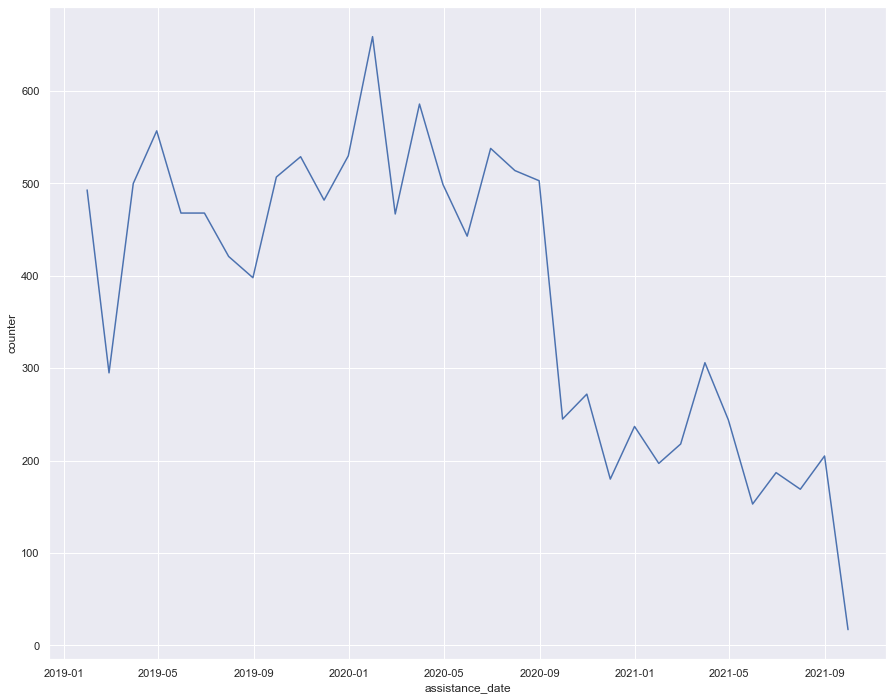

In [105]:
sns.lineplot(x='assistance_date', y="counter", data=care_management_month)

<AxesSubplot:xlabel='assistance_date', ylabel='Assistance_1'>

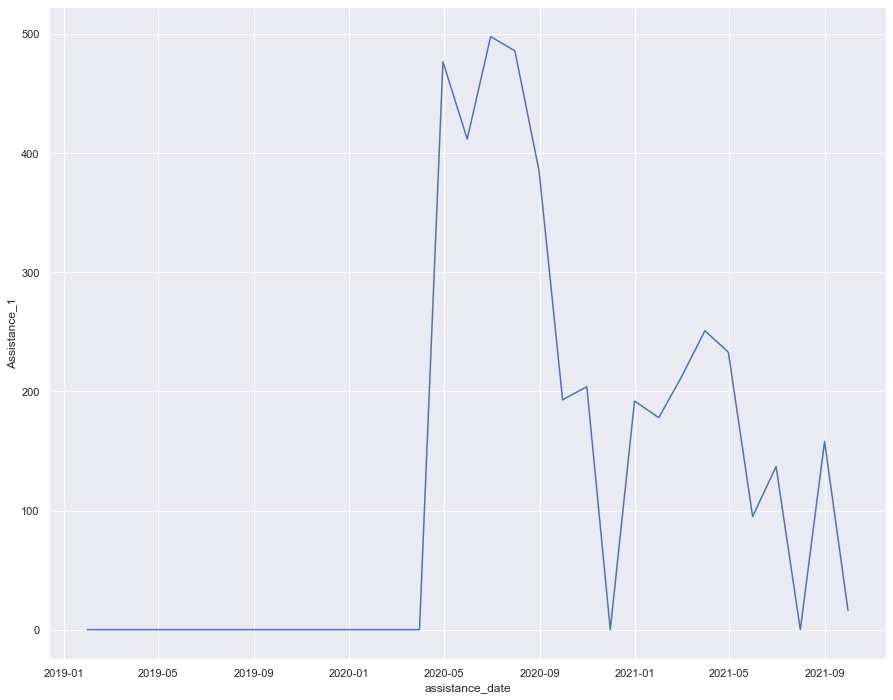

In [106]:
sns.lineplot(x='assistance_date', y="Assistance_1", data=care_management_month)

<AxesSubplot:xlabel='assistance_date', ylabel='Benefit_1'>

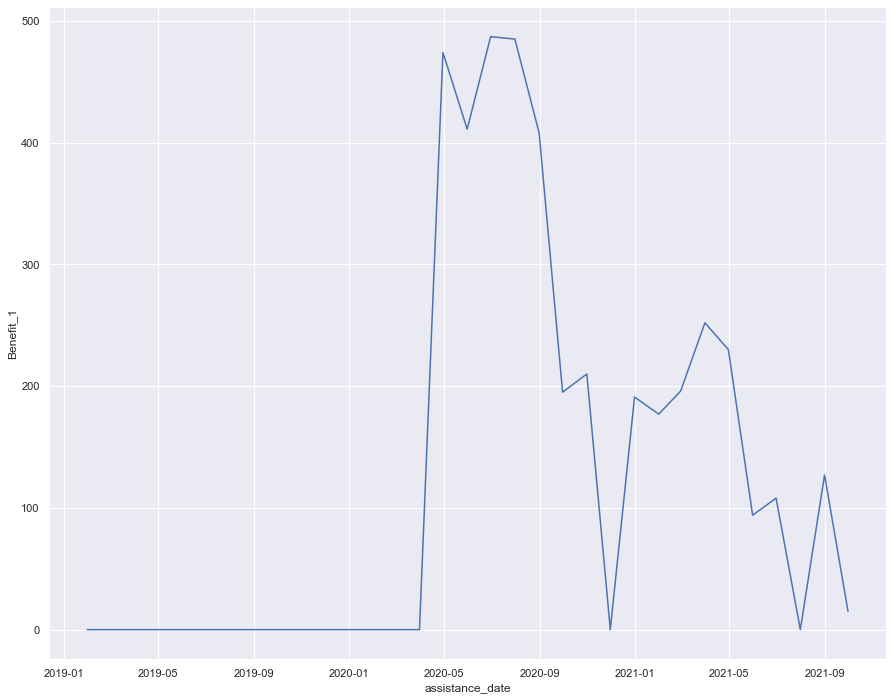

In [107]:
sns.lineplot(x='assistance_date', y="Benefit_1", data=care_management_month)

<AxesSubplot:xlabel='assistance_date', ylabel='Assistance_2'>

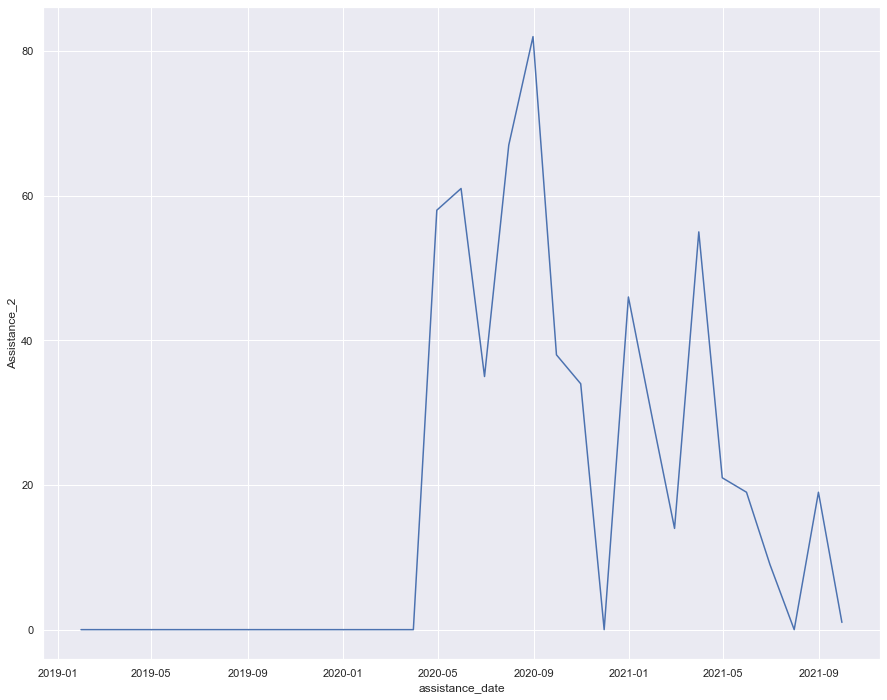

In [108]:
sns.lineplot(x='assistance_date', y="Assistance_2", data=care_management_month)

<AxesSubplot:xlabel='assistance_date', ylabel='Benefit_2'>

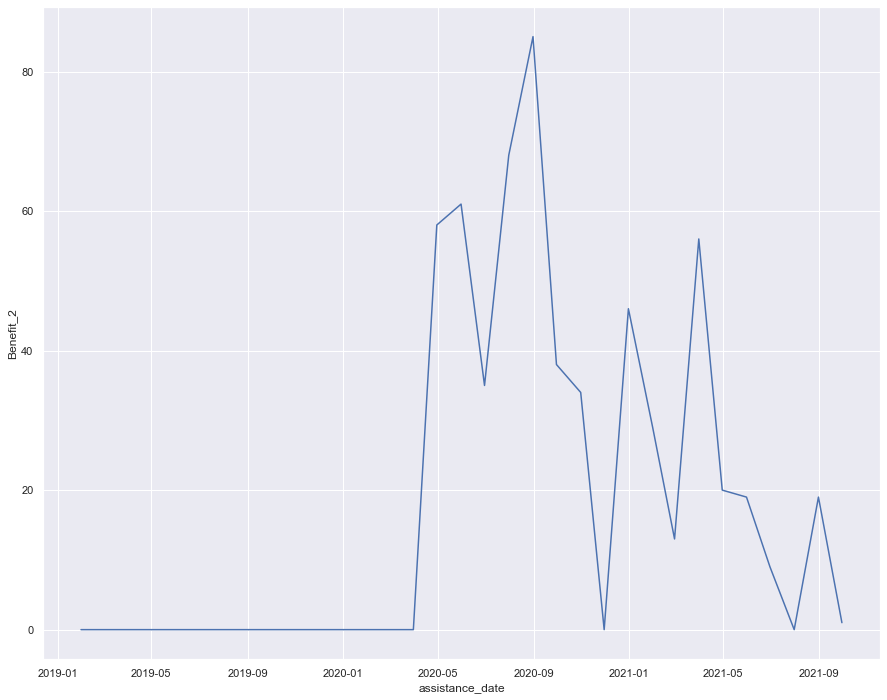

In [109]:
sns.lineplot(x='assistance_date', y="Benefit_2", data=care_management_month)

<AxesSubplot:xlabel='assistance_date', ylabel='Assistance_3'>

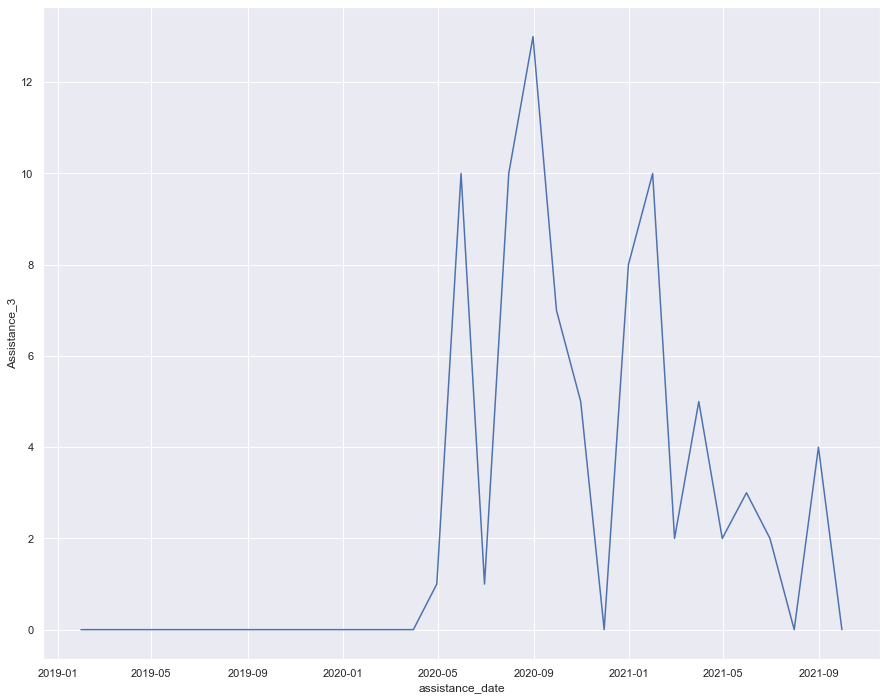

In [110]:
sns.lineplot(x='assistance_date', y="Assistance_3", data=care_management_month)

<AxesSubplot:xlabel='assistance_date', ylabel='Benefit_3'>

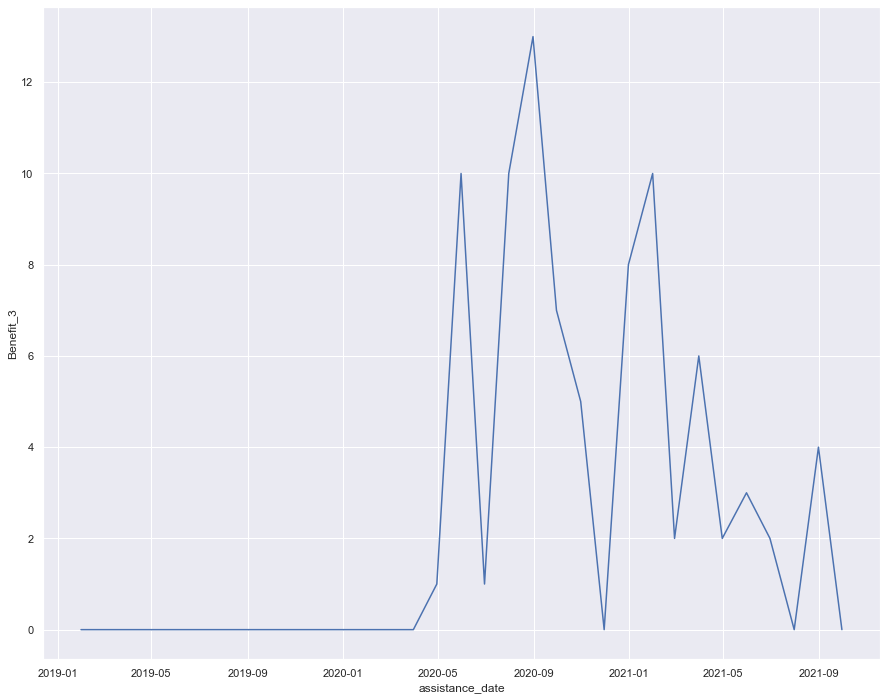

In [111]:
sns.lineplot(x='assistance_date', y="Benefit_3", data=care_management_month)

In [ ]:
care_management_data.groupby('assistant')

In [13]:
care_management_data = care_management_data.set_index('anon_ID')
volunteer_services_data = volunteer_services_data.set_index('anon_ID')
client_info_data = client_info_data.set_index('anon_ID')
pantry_data = pantry_data.set_index('anon_ID')

In [23]:
client_info_data

,county,poverty,minority,age_group
anon_ID,,,,
1,Montgomery,No,NaN,P
2,Montgomery,No,No,D
3,Montgomery,No,No,P
5,Montgomery,No,NaN,G
6,Montgomery,Yes,NaN,NaN
...,...,...,...,...
389,Other,NaN,Yes,NaN
602,Other,NaN,No,NaN
166,Other,NaN,No,NaN


In [24]:
care_management_data

,assistance_date,assistance_category,amount,unit,CommType,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3
anon_ID,,,,,,,,,,,,,
531,2019-01-01 12:50:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,2019-01-02 07:30:00,"Remote Contact with client (phone, email)",2.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,2019-01-02 09:50:00,"Remote Contact with client (phone, email)",14.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,2019-01-02 10:10:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,2019-01-02 10:15:00,"Remote Contact with client (phone, email)",1.0,Minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2021-09-13 11:40:00,Remote Contact w/o client,1.0,Minutes,Call,Client,ElderNet,ElderNet,Coordination,NaN,NaN,NaN,NaN
502,2021-09-15 09:35:00,"Remote Contact with client (phone, email)",7.0,Minutes,Call,Client,Other Party,NaN,NaN,NaN,NaN,NaN,NaN
30,2021-09-15 10:55:00,"Remote Contact with client (phone, email)",18.0,Minutes,Call,Client,ElderNet,Food,Coordination,NaN,NaN,NaN,NaN


In [26]:
care_management_data['assistance_category'].values

array(['Remote Contact with client (phone, email)',
       'Remote Contact with client (phone, email)',
       'Remote Contact with client (phone, email)', ...,
       'Remote Contact with client (phone, email)',
       'Remote Contact w/o client',
       'Remote Contact with client (phone, email)'], dtype=object)

In [246]:
#client_data_joined = client_data_joined.join(pantry_data, on = 'anon_ID', how = 'left')
client_data_joined = client_info_data.merge(pantry_data_grouped,on = 'anon_ID', how = 'left')
client_data_joined

,anon_ID,county,poverty,minority,age_group,assistance_category,unit,amount,counter
0,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN
1,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0
2,2,Montgomery,No,No,D,Food Pantry: Holiday Baskets,Dollars,25.0,1.0
3,2,Montgomery,No,No,D,Food Pantry: Holiday Baskets,Pounds,90.0,3.0
4,3,Montgomery,No,No,P,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
879,389,Other,NaN,Yes,NaN,NaN,NaN,NaN,NaN
880,602,Other,NaN,No,NaN,NaN,NaN,NaN,NaN
881,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN
882,638,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
client_data_joined = client_data_joined.rename({'assistance_category':'pantry_assistance_category','unit':'pantry_unit','amount':'pantry_amount',
                                               'counter':'pantry_counter'}, axis=1)
client_data_joined

,anon_ID,county,poverty,minority,age_group,pantry_assistance_category,pantry_unit,pantry_amount,pantry_counter
0,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN
1,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0
2,2,Montgomery,No,No,D,Food Pantry: Holiday Baskets,Dollars,25.0,1.0
3,2,Montgomery,No,No,D,Food Pantry: Holiday Baskets,Pounds,90.0,3.0
4,3,Montgomery,No,No,P,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
879,389,Other,NaN,Yes,NaN,NaN,NaN,NaN,NaN
880,602,Other,NaN,No,NaN,NaN,NaN,NaN,NaN
881,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN
882,638,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
client_data_joined = client_data_joined.merge(volunteer_services_data_grouped, on = 'anon_ID', how = 'left')
client_data_joined

,anon_ID,county,poverty,minority,age_group,pantry_assistance_category,pantry_unit,pantry_amount,pantry_counter,category,diff_ride_days,rider_num_rides,appt_duration,counter
0,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,2009 days,0.0,54.25,28.0
2,2,Montgomery,No,No,D,Food Pantry: Holiday Baskets,Dollars,25.0,1.0,Doctor Appt,2009 days,0.0,54.25,28.0
3,2,Montgomery,No,No,D,Food Pantry: Holiday Baskets,Pounds,90.0,3.0,Doctor Appt,2009 days,0.0,54.25,28.0
4,3,Montgomery,No,No,P,NaN,NaN,NaN,NaN,Doctor Appt,378 days,0.0,12.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN,Board or Committee Mtg,2268 days,0.0,1156.00,528.0
1148,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN,Special Projects,2268 days,0.0,1.00,1.0
1149,638,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Skilled Work,1861 days,0.0,565.50,18.0
1150,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Board or Committee Mtg,1760 days,0.0,197.00,58.0


In [250]:
client_data_joined = client_data_joined.rename({'category':'volunteer_category','diff_ride_days':'volunteer_diff_ride_days','appt_duration':'volunteer_appt_duration',
                                               'counter':'volunteer_counter'}, axis=1)
client_data_joined

,anon_ID,county,poverty,minority,age_group,pantry_assistance_category,pantry_unit,pantry_amount,pantry_counter,volunteer_category,volunteer_diff_ride_days,rider_num_rides,volunteer_appt_duration,volunteer_counter
0,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,2009 days,0.0,54.25,28.0
2,2,Montgomery,No,No,D,Food Pantry: Holiday Baskets,Dollars,25.0,1.0,Doctor Appt,2009 days,0.0,54.25,28.0
3,2,Montgomery,No,No,D,Food Pantry: Holiday Baskets,Pounds,90.0,3.0,Doctor Appt,2009 days,0.0,54.25,28.0
4,3,Montgomery,No,No,P,NaN,NaN,NaN,NaN,Doctor Appt,378 days,0.0,12.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN,Board or Committee Mtg,2268 days,0.0,1156.00,528.0
1148,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN,Special Projects,2268 days,0.0,1.00,1.0
1149,638,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Skilled Work,1861 days,0.0,565.50,18.0
1150,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Board or Committee Mtg,1760 days,0.0,197.00,58.0


In [251]:
client_data_joined = client_data_joined.merge(care_management_data_grouped_1, on = 'anon_ID', how = 'left')
client_data_joined

,anon_ID,county,poverty,minority,age_group,pantry_assistance_category,pantry_unit,pantry_amount,pantry_counter,volunteer_category,...,Party,InitiatedBy,Benefit_1,Assistance_1,Benefit_2,Assistance_2,Benefit_3,Assistance_3,amount,counter
0,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,Client,ElderNet,NaN,Enrollment,Housing,Coordination,NaN,NaN,25.0,1.0
1,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
2,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
3,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,...,Client,Eldernet,Eldernet,Coordination,NaN,NaN,NaN,NaN,3.0,1.0
4,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14403,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN,Board or Committee Mtg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14404,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN,Special Projects,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14405,638,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Skilled Work,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14406,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Board or Committee Mtg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
client_data_joined = client_data_joined.rename({'assistance_category':'care_management_category','unit':'care_management_unit','CommType':'care_management_CommType',
                                               'Party':'care_management_Party','InitiatedBy':'care_management_InitiatedBy','Benefit_1':'care_management_Benefit_1',
                                                'Assistance_1':'care_management_Assistance_1',
                                               'Benefit_2':'care_management_Benefit_2','Assistance_2':'care_management_Assistance_2','Benefit_3':'care_management_Benefit_3',
                                               'Assistance_3':'care_management_Assistance_3','amount':'care_management_amount','counter':'care_management_counter'}, axis=1)
client_data_joined

,anon_ID,county,poverty,minority,age_group,pantry_assistance_category,pantry_unit,pantry_amount,pantry_counter,volunteer_category,...,care_management_Party,care_management_InitiatedBy,care_management_Benefit_1,care_management_Assistance_1,care_management_Benefit_2,care_management_Assistance_2,care_management_Benefit_3,care_management_Assistance_3,care_management_amount,care_management_counter
0,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,Client,ElderNet,NaN,Enrollment,Housing,Coordination,NaN,NaN,25.0,1.0
1,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
2,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
3,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,...,Client,Eldernet,Eldernet,Coordination,NaN,NaN,NaN,NaN,3.0,1.0
4,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14403,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN,Board or Committee Mtg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14404,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN,Special Projects,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14405,638,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Skilled Work,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14406,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Board or Committee Mtg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
client_data_joined.columns

Index(['anon_ID', 'county', 'poverty', 'minority', 'age_group',
       'pantry_assistance_category', 'pantry_unit', 'pantry_amount',
       'pantry_counter', 'volunteer_category', 'volunteer_diff_ride_days',
       'rider_num_rides', 'volunteer_appt_duration', 'volunteer_counter',
       'care_management_category', 'care_management_unit',
       'care_management_CommType', 'care_management_Party',
       'care_management_InitiatedBy', 'care_management_Benefit_1',
       'care_management_Assistance_1', 'care_management_Benefit_2',
       'care_management_Assistance_2', 'care_management_Benefit_3',
       'care_management_Assistance_3', 'care_management_amount',
       'care_management_counter'],
      dtype='object')

In [258]:
client_data_joined['care_management_counter'].sort_values(ascending=False)

1576     194.0
1813     194.0
2366     194.0
2129     194.0
1892     194.0
         ...  
14403      NaN
14404      NaN
14405      NaN
14406      NaN
14407      NaN
Name: care_management_counter, Length: 14408, dtype: float64

In [254]:
client_data_joined

,anon_ID,county,poverty,minority,age_group,pantry_assistance_category,pantry_unit,pantry_amount,pantry_counter,volunteer_category,...,care_management_Party,care_management_InitiatedBy,care_management_Benefit_1,care_management_Assistance_1,care_management_Benefit_2,care_management_Assistance_2,care_management_Benefit_3,care_management_Assistance_3,care_management_amount,care_management_counter
0,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,Client,ElderNet,NaN,Enrollment,Housing,Coordination,NaN,NaN,25.0,1.0
1,1,Montgomery,No,NaN,P,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
2,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
3,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,...,Client,Eldernet,Eldernet,Coordination,NaN,NaN,NaN,NaN,3.0,1.0
4,2,Montgomery,No,No,D,Food Pantry: Food Pantry Poundage,Pounds,675.0,27.0,Doctor Appt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14403,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN,Board or Committee Mtg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14404,166,Other,NaN,No,NaN,NaN,NaN,NaN,NaN,Special Projects,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14405,638,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Skilled Work,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14406,81,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Board or Committee Mtg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
client_data_joined.groupby('unit_y').sum()

,amount_x,rider_num_rides,appt_duration,amount_y
unit_y,,,,
Boxes/Bags,40763.0,0.0,18624.50,30921.0
Dollars,2023555.0,0.0,584328.25,7488855.0
Pounds,69135626.5,0.0,18518241.00,206191055.0


In [19]:
client_data_joined.isna().sum()

county                        0
poverty                    1463
minority                  19247
age_group                  2039
assistance_date            1769
assistance_category        1769
amount                     1769
unit                       1769
CommType                 157052
Party                    156509
InitiatedBy              157075
Benefit_1                170487
Assistance_1             171090
Benefit_2                249412
Assistance_2             249476
Benefit_3                260555
Assistance_3             260641
rider_first_ride_date      5970
rider_last_ride_date       5970
rider_num_rides            5970
appt_date                  5970
appt_duration              5970
category                   5970
dtype: int64

In [60]:
pantry_data

,assistance_date,assistance_category,amount,unit
anon_ID,,,,
102,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
178,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
588,1/3/2019 10:30,Food Pantry: Food Pantry Poundage,25,Pounds
502,1/3/2019 11:15,Food Pantry: Food Pantry Poundage,25,Pounds
232,1/3/2019 11:30,Food Pantry: Food Pantry Poundage,25,Pounds
...,...,...,...,...
611,9/7/2021 14:15,Food Pantry: Food Pantry Poundage,25,Pounds
516,9/7/2021 14:55,Food Pantry: Food Pantry Poundage,25,Pounds
274,9/7/2021 15:00,Food Pantry: Food Pantry Poundage,25,Pounds


In [17]:
volunteer_services_data

,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category
anon_ID,,,,,,
276,2015-04-27,2021-11-16,0,9/15/2021,2.00,Doctor Appt
276,2015-04-27,2021-11-16,0,9/1/2021,2.00,Doctor Appt
276,2015-04-27,2021-11-16,0,8/26/2021,2.00,Doctor Appt
276,2015-04-27,2021-11-16,0,8/11/2021,2.00,Doctor Appt
276,2015-04-27,2021-11-16,0,8/10/2021,2.25,Doctor Appt
...,...,...,...,...,...,...
81,2015-05-01,2020-02-24,0,1/14/2019,2.00,Special Projects
81,2015-05-01,2020-02-24,0,1/14/2019,2.00,Special Projects
81,2015-05-01,2020-02-24,0,1/14/2019,7.00,Special Projects


In [131]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [136]:
volunteer_services_data['rider_first_ride_date'] = pd.to_datetime(volunteer_services_data['rider_first_ride_date'], infer_datetime_format=True)
volunteer_services_data['rider_last_ride_date'] = pd.to_datetime(volunteer_services_data['rider_last_ride_date'], infer_datetime_format=True)  

In [141]:
volunteer_services_data['diff_ride_days'] = abs(volunteer_services_data['rider_first_ride_date'] - volunteer_services_data['rider_last_ride_date'])

In [190]:
volunteer_services_data.groupby(['anon_ID','diff_ride_days']).count()

,,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category,diff_days
anon_ID,diff_ride_days,,,,,,,
2,2009 days,28,28,28,28,28,28,28
3,378 days,6,6,6,6,6,6,6
4,462 days,34,34,34,34,34,34,34
7,1215 days,14,14,14,14,14,14,14
8,2361 days,86,86,86,86,86,86,86
...,...,...,...,...,...,...,...,...
630,494 days,17,17,17,17,17,17,17
631,1795 days,24,24,24,24,24,24,24
634,1409 days,2,2,2,2,2,2,2


In [259]:
volunteer_services_data['category'].unique()

array(['Doctor Appt', 'Errands', 'Shopping', 'Friendly Visit',
       'Skilled Work', 'Telephone Reassurance', 'Odd Jobs', 'Yard Work',
       'Pantry Delivery', 'Special Projects', 'Pantry',
       'Board or Committee Mtg'], dtype=object)

In [241]:
volunteer_services_data['counter'] = 1

In [242]:

volunteer_services_data_grouped = volunteer_services_data.groupby(['anon_ID','category','diff_ride_days']).sum()
volunteer_services_data_grouped = volunteer_services_data_grouped.reset_index()
volunteer_services_data_grouped

,anon_ID,category,diff_ride_days,rider_num_rides,appt_duration,counter
0,2,Doctor Appt,2009 days,0,54.25,28
1,3,Doctor Appt,378 days,0,12.00,6
2,4,Doctor Appt,462 days,0,47.50,23
3,4,Friendly Visit,462 days,0,41.00,11
4,7,Doctor Appt,1215 days,0,27.75,14
...,...,...,...,...,...,...
302,638,Skilled Work,1861 days,0,565.50,18
303,641,Doctor Appt,1426 days,0,2.00,1
304,641,Friendly Visit,1426 days,0,1.50,2
305,641,Odd Jobs,1426 days,0,4.00,2


In [126]:
volunteer_services_data.groupby(['anon_ID']).sum()

,rider_num_rides,appt_duration
anon_ID,,
2,0,54.25
3,0,12.00
4,0,88.50
7,0,27.75
8,0,170.75
...,...,...
630,0,71.00
631,0,91.50
634,0,11.00


In [123]:
volunteer_services_data.describe()

,anon_ID,rider_num_rides,appt_duration
count,4925.000000,4925.0,4925.000000
mean,329.857462,0.0,3.165279
std,187.983010,0.0,5.648763
min,2.000000,0.0,0.000000
25%,166.000000,0.0,2.000000
50%,297.000000,0.0,2.000000
75%,505.000000,0.0,3.000000
max,641.000000,0.0,200.000000


In [59]:
volunteer_services_data.groupby('category').mean()

,rider_num_rides,appt_duration
category,,
Board or Committee Mtg,0.0,2.308874
Doctor Appt,0.0,2.077426
Errands,0.0,1.863924
Friendly Visit,0.0,3.653678
Odd Jobs,0.0,4.662791
Pantry,0.0,9.078755
Pantry Delivery,0.0,5.216667
Shopping,0.0,2.916019
Skilled Work,0.0,28.425000


In [60]:
volunteer_services_data.groupby('category').sum()

,rider_num_rides,appt_duration
category,,
Board or Committee Mtg,0,1353.00
Doctor Appt,0,4366.75
Errands,0,147.25
Friendly Visit,0,2086.25
Odd Jobs,0,200.50
Pantry,0,2478.50
Pantry Delivery,0,156.50
Shopping,0,3376.75
Skilled Work,0,568.50


<AxesSubplot:xlabel='category', ylabel='count'>

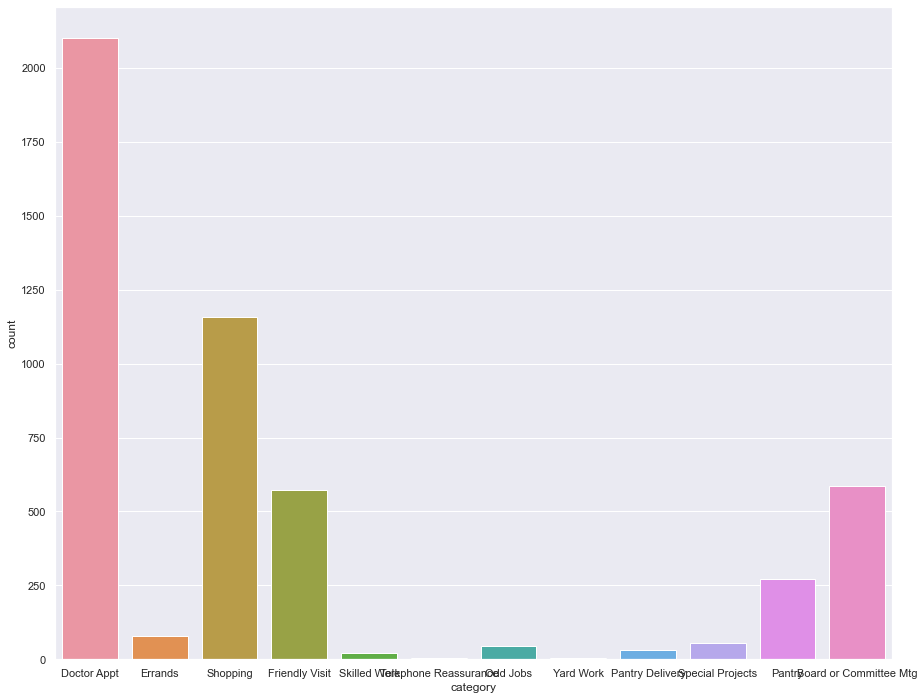

In [124]:
sns.countplot(x='category', data = volunteer_services_data)

In [22]:
volunteer_services_data['rider_num_rides'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
volunteer

In [20]:
client_info_data

,county,poverty,minority,age_group
anon_ID,,,,
1,Montgomery,No,NaN,P
2,Montgomery,No,No,D
3,Montgomery,No,No,P
5,Montgomery,No,NaN,G
6,Montgomery,Yes,NaN,NaN
...,...,...,...,...
389,Other,NaN,Yes,NaN
602,Other,NaN,No,NaN
166,Other,NaN,No,NaN


In [30]:
donations_data

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
0,92,19003.0,Active,False,False,N,01/01/2019,40.0,Check,Clients,Gift
1,321,19096.0,Active,False,False,N,01/02/2019,25.0,Check,Fall Towns,Gift
2,559,19146.0,Active,False,False,N,01/02/2019,250.0,Check,Fall Towns,Gift
3,926,19041.0,Active,False,False,N,01/03/2019,50.0,Check,Fall Towns,Gift
4,860,10038.0,Active,False,False,N,01/04/2019,165.0,Check,Misc,Gift
...,...,...,...,...,...,...,...,...,...,...,...
2185,330,19103.0,Active,False,False,N,09/02/2021,150.0,Check,Misc,Gift
2186,197,19073.0,Active,False,False,N,09/05/2021,200.0,Check,Misc,Gift
2187,592,19003.0,Active,False,False,N,09/14/2021,75.0,Check,Sprg Evt,Gift
2188,835,19072.0,Active,False,False,N,09/14/2021,20.0,Check,Board,Gift


In [50]:
donations_data['campaign'].value_counts()

Fall Towns    874
Sprg Evt      645
Misc          199
Emerg fund    130
Clients        69
Foundation     59
Board          41
Mem-hon        40
Church         29
Corporatio     22
Newsletter     22
CAC            20
Escort Dri     19
Special Pr      9
D.Young Fu      3
United Way      3
AMCRC           2
Grants          2
In-Kind         1
In/Out          1
Name: campaign, dtype: int64

In [57]:
donations_data.groupby('campaign').sum()

,anon_donor_id,zip,do_not_mail,do_not_call,amount
campaign,,,,,
AMCRC,792,38020.0,0,0,16500.00
Board,25053,781036.0,0,0,12360.00
CAC,13123,383349.0,0,0,5775.00
Church,17833,552559.0,0,0,64510.00
Clients,20996,1262406.0,0,0,2959.00
Corporatio,12046,328284.0,0,0,43853.10
D.Young Fu,2478,57288.0,0,0,468.00
Emerg fund,76159,2306166.0,1,1,133508.81
Escort Dri,3367,361058.0,0,0,10187.50


In [56]:
organization_donations = donations_data.loc[donations_data['organisation'] == 'Y'].sort_values(by='amount', ascending = False)
organization_donations

,anon_donor_id,zip,status,do_not_mail,do_not_call,organisation,date,amount,form,campaign,target
1877,135,19003.0,Active,False,False,Y,04/09/2021,22814.3,Check,Special Pr,Gift
1827,135,19003.0,Active,False,False,Y,02/12/2021,22054.7,Check,Emerg fund,Gift
152,135,19003.0,Active,False,False,Y,04/12/2019,20000.0,Check,Foundation,Gift
1009,135,19003.0,Active,False,False,Y,04/16/2020,20000.0,Check,Grants,Gift
1887,135,19003.0,Active,False,False,Y,04/16/2021,20000.0,Check,Grants,Gift
...,...,...,...,...,...,...,...,...,...,...,...
375,743,NaN,Active,False,False,Y,09/05/2019,2.0,Check,Misc,Gift
256,743,NaN,Active,False,False,Y,05/06/2019,2.0,Check,Fall Towns,Gift
324,743,NaN,Active,False,False,Y,07/19/2019,2.0,Check,Misc,Gift
209,743,NaN,Active,False,False,Y,04/29/2019,2.0,Check,Fall Towns,Gift


In [55]:
organization_donations['anon_donor_id'].value_counts()

135     32
743     24
1028    11
815      6
242      4
359      4
515      3
850      2
1038     2
925      2
165      2
209      2
36       2
505      2
789      1
922      1
836      1
528      1
429      1
696      1
195      1
444      1
596      1
332      1
66       1
625      1
667      1
350      1
682      1
817      1
Name: anon_donor_id, dtype: int64

In [49]:
donations_data.groupby('zip').sum().sort_values(by='amount', ascending=False)

,anon_donor_id,do_not_mail,do_not_call,amount
zip,,,,
19010.0,153167,3,3,195993.17
19003.0,73284,3,3,165139.50
19101.0,456,0,0,100000.00
19096.0,223352,6,3,75974.00
19428.0,1001,0,0,60000.00
...,...,...,...,...
22827.0,44,0,0,18.00
19044.0,90,0,0,10.00
8077.0,416,0,0,10.00


In [127]:
pantry_data

,anon_ID,assistance_date,assistance_category,amount,unit
0,102,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
1,178,1/3/2019 10:00,Food Pantry: Food Pantry Poundage,25,Pounds
2,588,1/3/2019 10:30,Food Pantry: Food Pantry Poundage,25,Pounds
3,502,1/3/2019 11:15,Food Pantry: Food Pantry Poundage,25,Pounds
4,232,1/3/2019 11:30,Food Pantry: Food Pantry Poundage,25,Pounds
...,...,...,...,...,...
6268,611,9/7/2021 14:15,Food Pantry: Food Pantry Poundage,25,Pounds
6269,516,9/7/2021 14:55,Food Pantry: Food Pantry Poundage,25,Pounds
6270,274,9/7/2021 15:00,Food Pantry: Food Pantry Poundage,25,Pounds
6271,524,9/7/2021 15:15,Food Pantry: Food Pantry Poundage,25,Pounds


In [243]:
pantry_data['counter'] = 1

In [244]:
pantry_data_grouped = pantry_data.groupby(['anon_ID','assistance_category','unit']).sum().reset_index()

In [245]:
pantry_data_grouped

,anon_ID,assistance_category,unit,amount,counter
0,2,Food Pantry: Food Pantry Poundage,Pounds,675,27
1,2,Food Pantry: Holiday Baskets,Dollars,25,1
2,2,Food Pantry: Holiday Baskets,Pounds,90,3
3,5,Food Pantry: Food Pantry Poundage,Pounds,1225,49
4,6,Food Pantry: Food Pantry Poundage,Pounds,75,3
...,...,...,...,...,...
652,635,Food Pantry: Food Pantry Poundage,Pounds,1225,49
653,635,Food Pantry: Holiday Baskets,Pounds,60,2
654,636,Food Pantry: Food Pantry Poundage,Pounds,25,1
655,639,Food Pantry: Holiday Baskets,Dollars,75,1


<AxesSubplot:xlabel='unit', ylabel='count'>

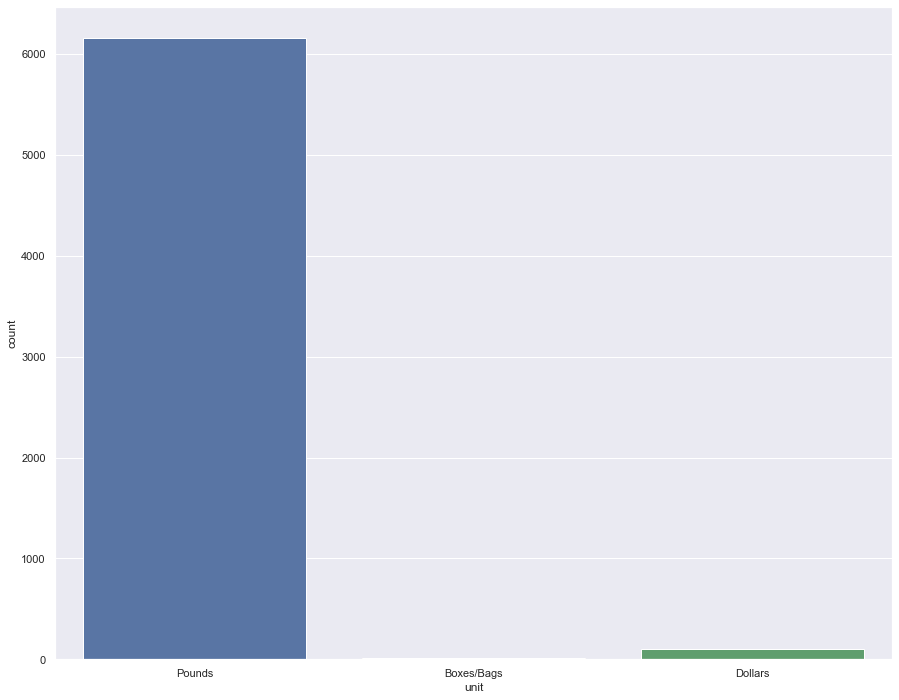

In [129]:
sns.countplot(x='unit',data = pantry_data)

<AxesSubplot:xlabel='assistance_category', ylabel='count'>

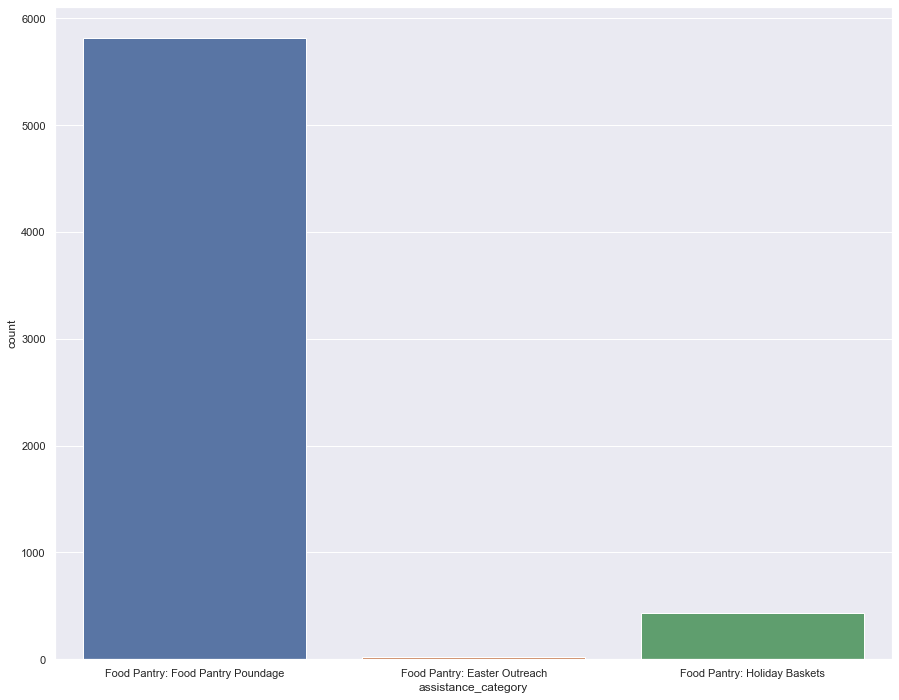

In [130]:
sns.countplot(x='assistance_category',data = pantry_data)

In [128]:
pantry_data.groupby(['anon_ID','assistance_category']).sum()

amount
anon_ID assistance_category                      
2       Food Pantry: Food Pantry Poundage     675
        Food Pantry: Holiday Baskets          115
5       Food Pantry: Food Pantry Poundage    1225
6       Food Pantry: Food Pantry Poundage      75
8       Food Pantry: Food Pantry Poundage     825
...                                           ...
634     Food Pantry: Holiday Baskets          140
635     Food Pantry: Food Pantry Poundage    1225
        Food Pantry: Holiday Baskets           60
636     Food Pantry: Food Pantry Poundage      25
639     Food Pantry: Holiday Baskets          195

[592 rows x 1 columns]

In [35]:
pantry_data.groupby('unit').sum()

,amount
unit,
Boxes/Bags,49
Dollars,3045
Pounds,155605


In [27]:
def count_plots(df):
    for col in df:
        fig = plt.figure(figsize =(10, 7))
 
        # Horizontal Bar Plot

        sns.set_theme(style="darkgrid")
        ax = sns.countplot(x=col, data=df)
        sns.set(rc={'figure.figsize':(15,12)})
        # Show Plot
        plt.show()

In [30]:
import seaborn as sns

In [31]:
count_plots(care_management_data)

KeyboardInterrupt: 

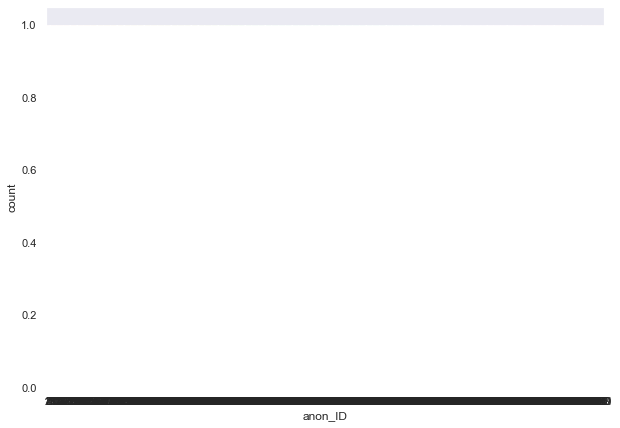

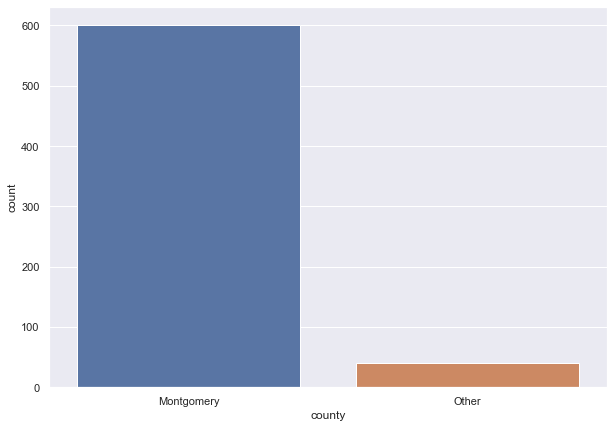

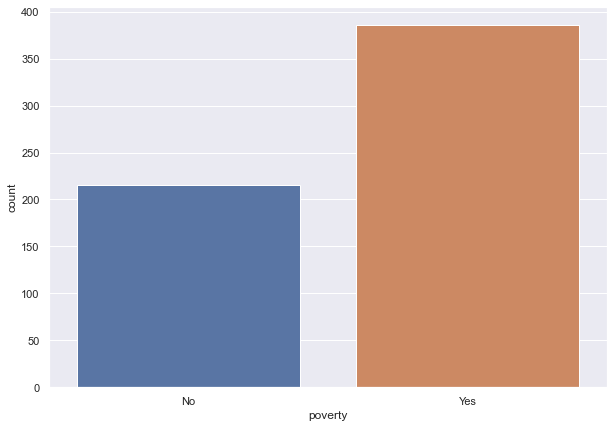

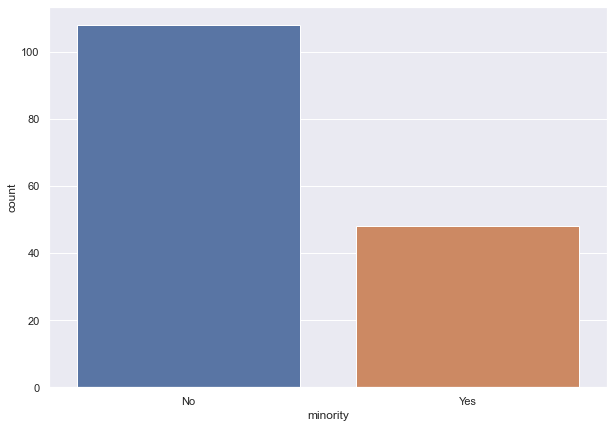

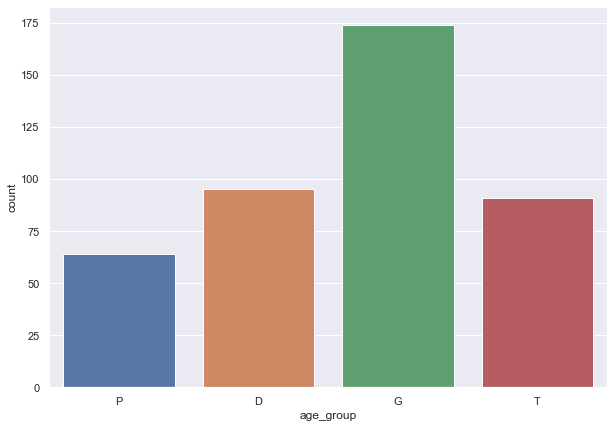

In [29]:
count_plots(client_info_data)

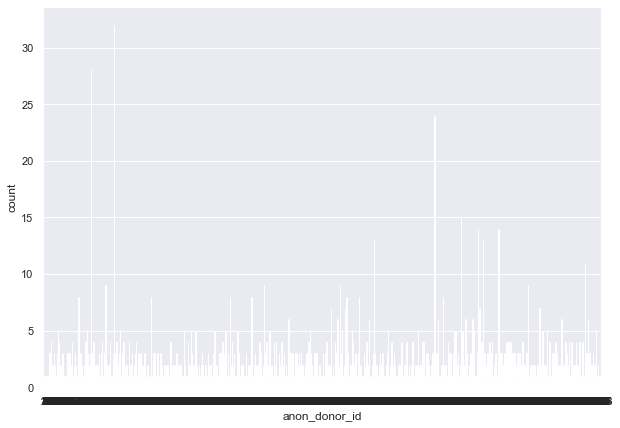

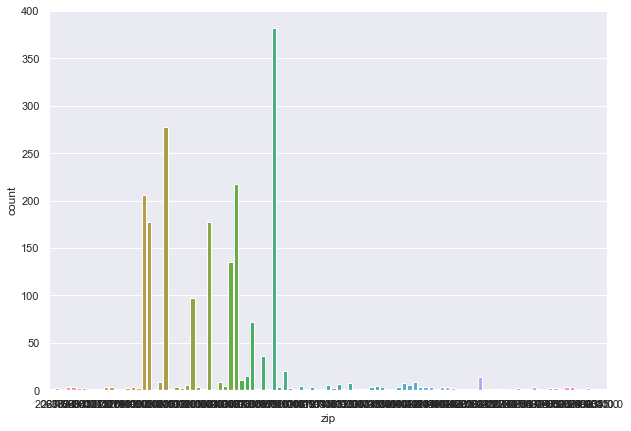

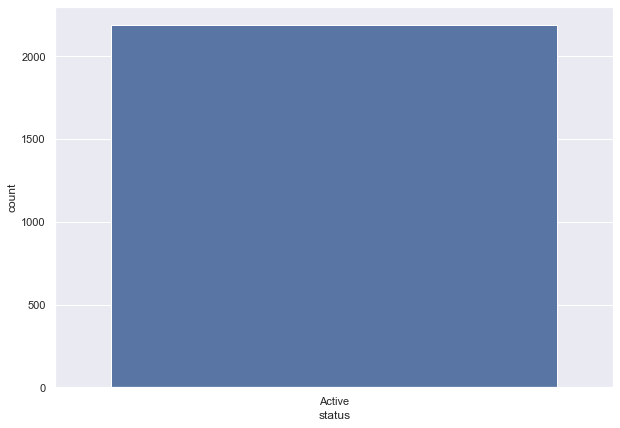

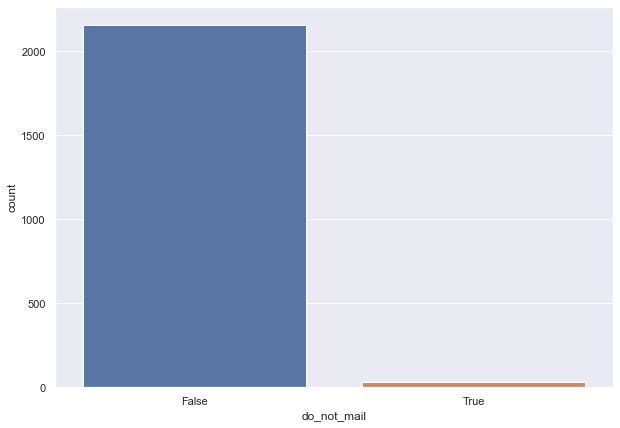

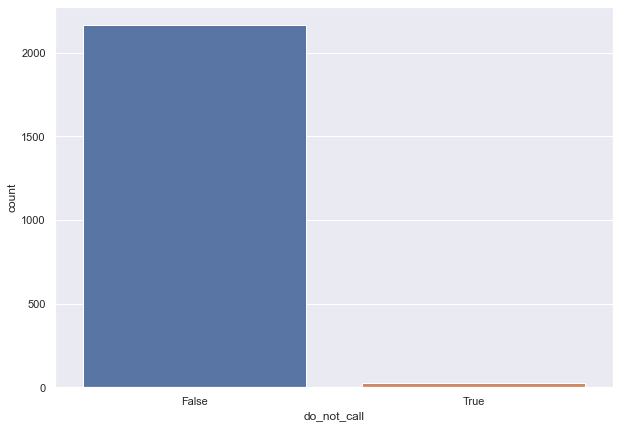

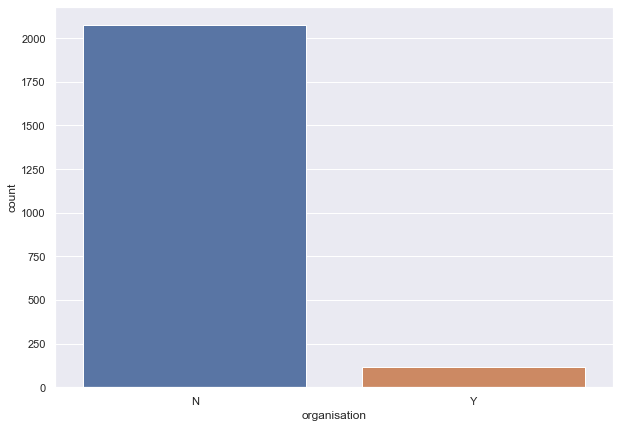

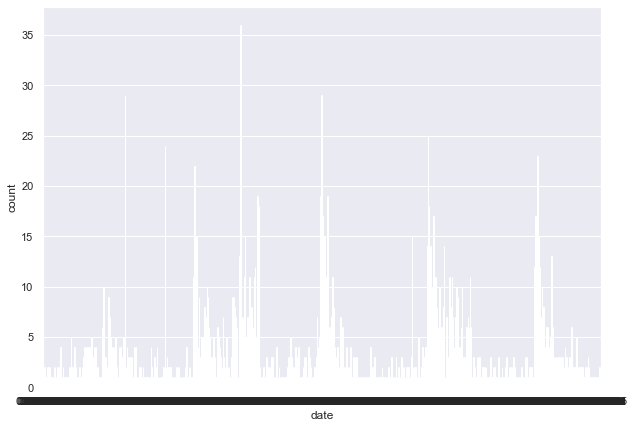

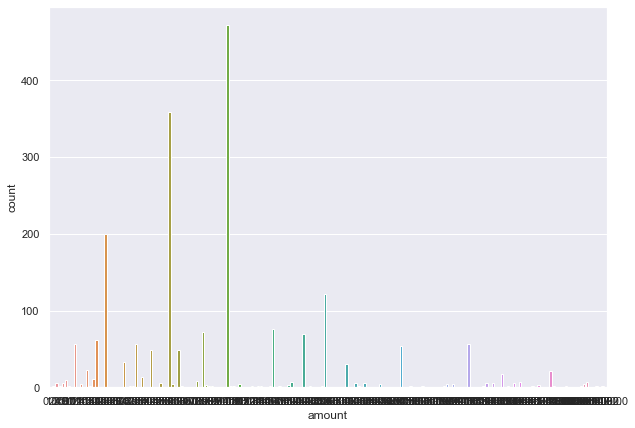

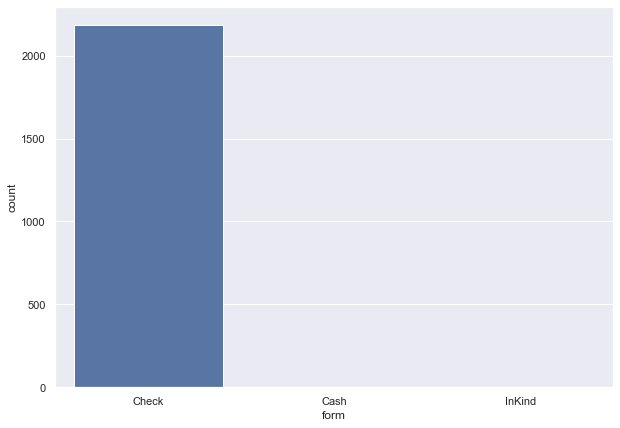

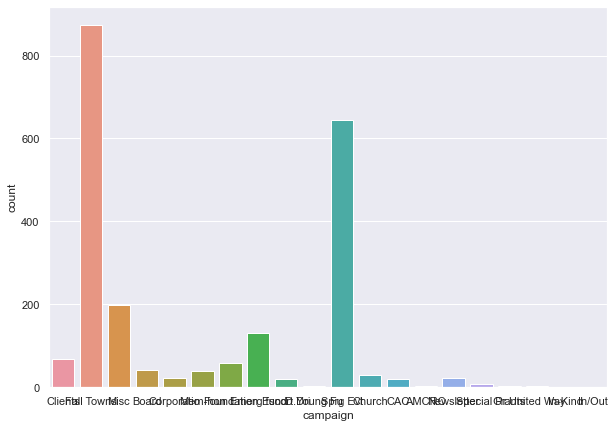

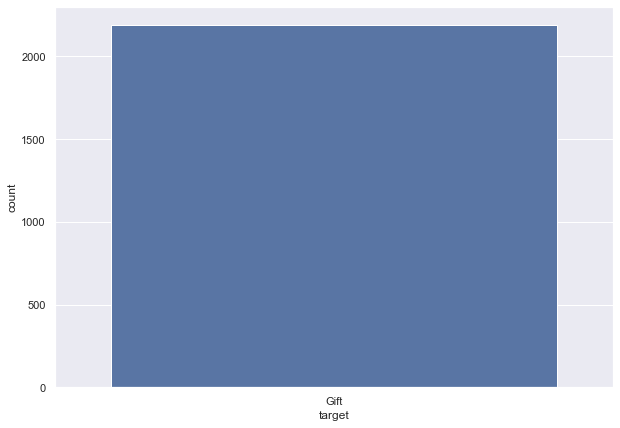

In [31]:
count_plots(donations_data)

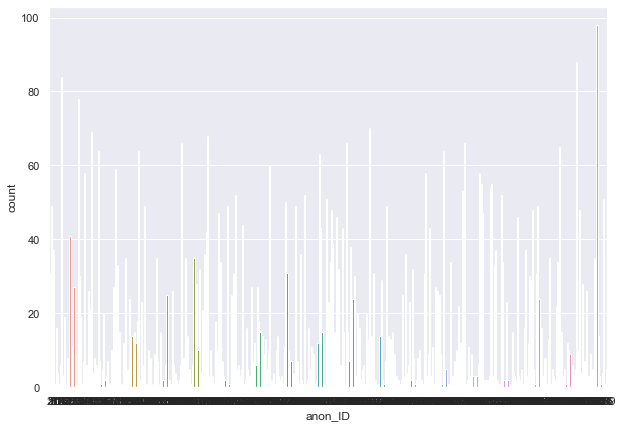

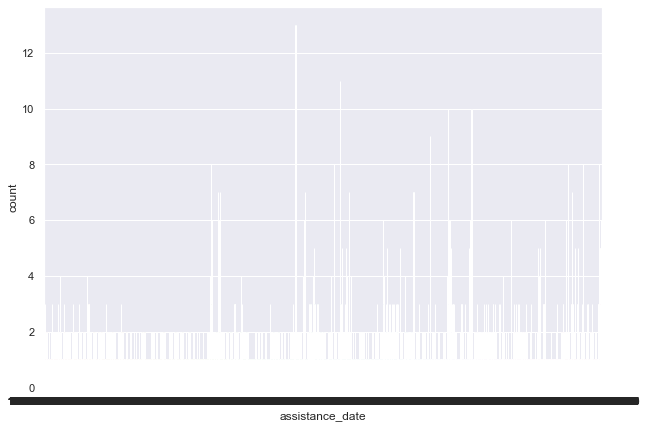

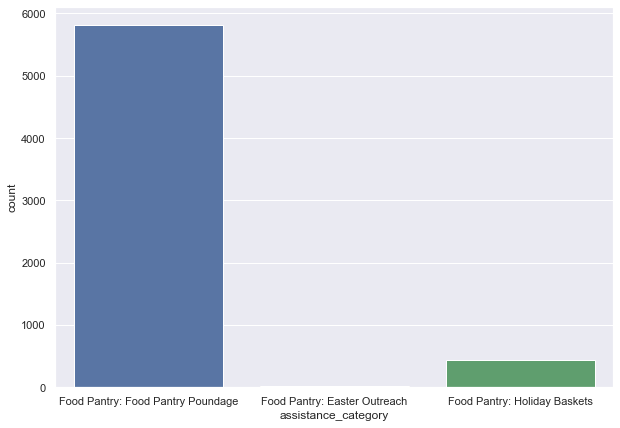

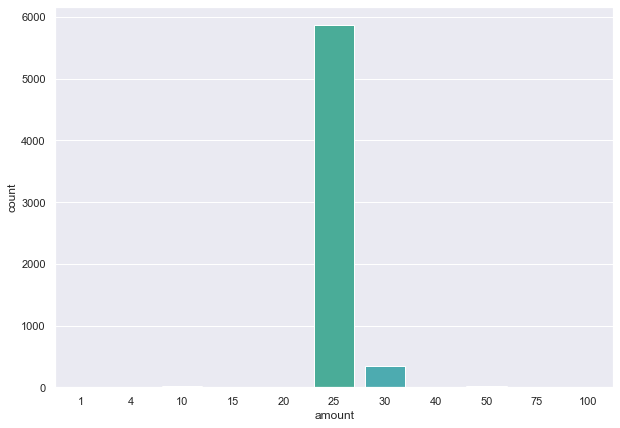

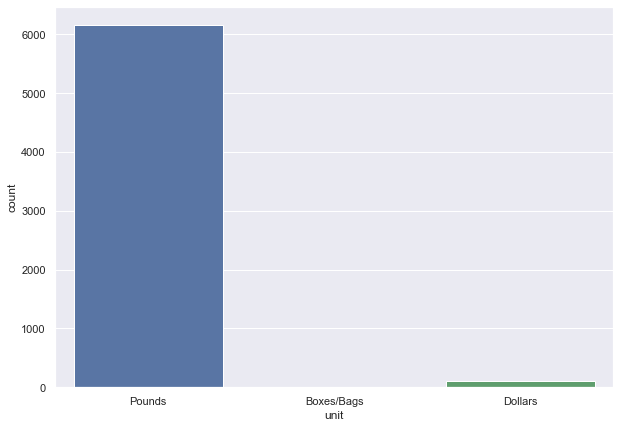

In [33]:
count_plots(pantry_data)

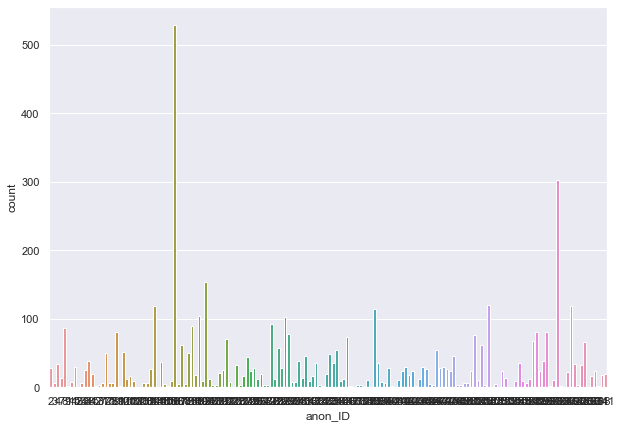

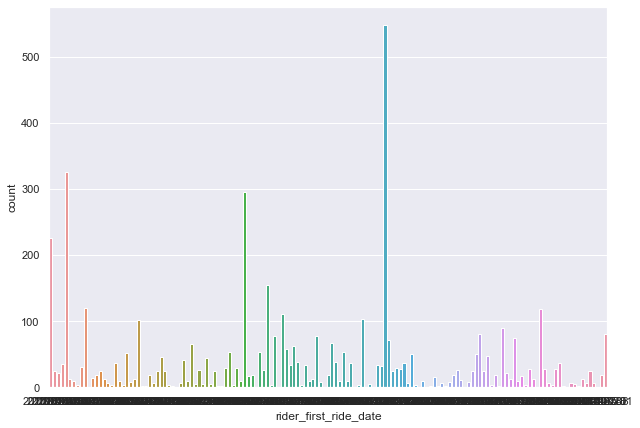

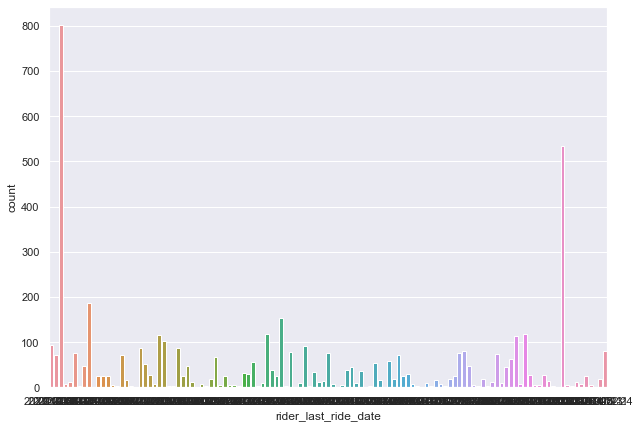

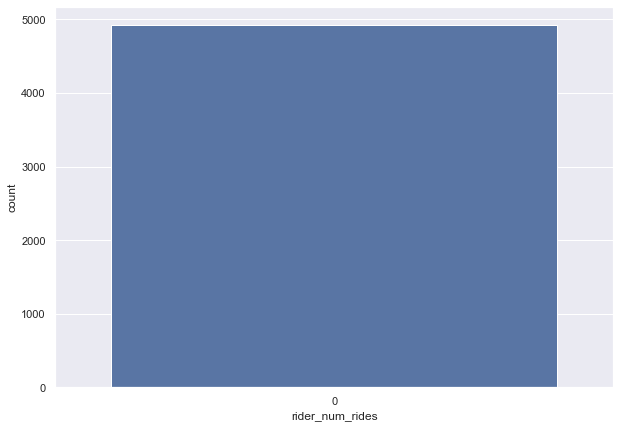

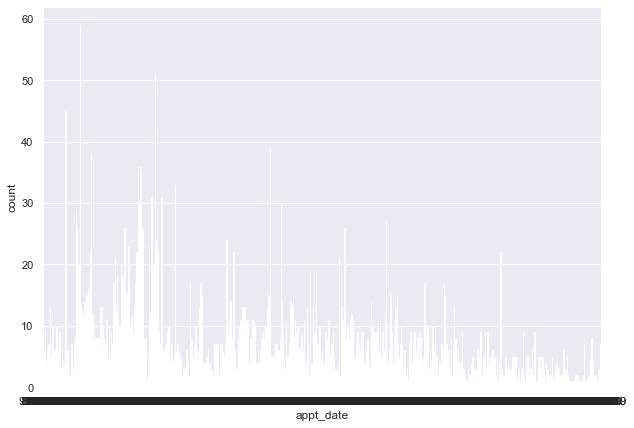

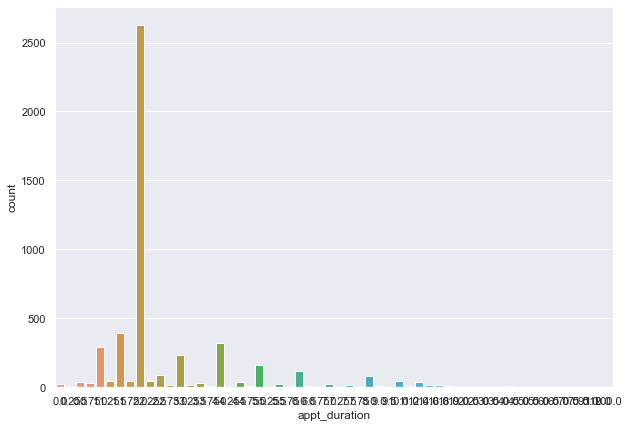

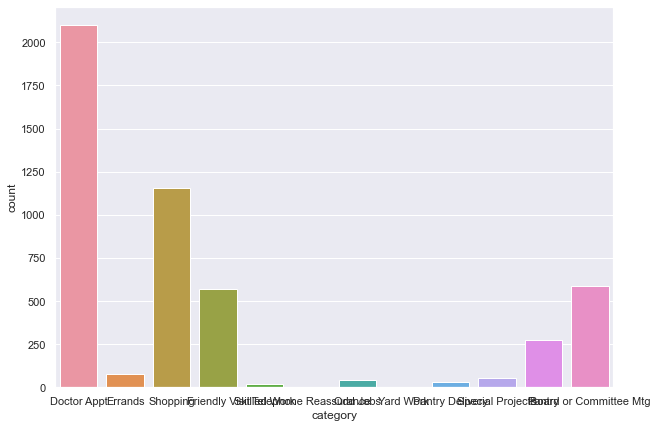

In [34]:
count_plots(volunteer_services_data)

In [35]:
pantry_data.columns

Index(['anon_ID', 'assistance_date', 'assistance_category', 'amount', 'unit'], dtype='object')

assistance_category
Food Pantry: Easter Outreach         AxesSubplot(0.125,0.125;0.775x0.755)
Food Pantry: Food Pantry Poundage    AxesSubplot(0.125,0.125;0.775x0.755)
Food Pantry: Holiday Baskets         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

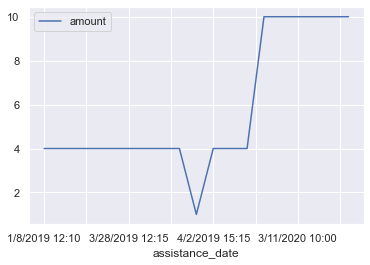

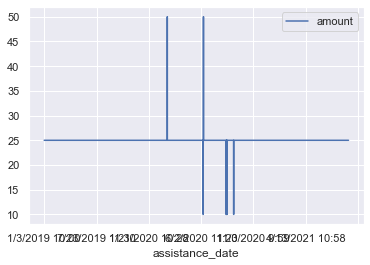

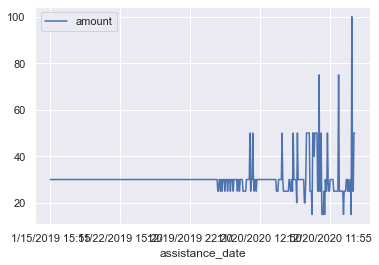

In [39]:
pantry_data.groupby('assistance_category').plot(x = 'assistance_date', y = 'amount')

{'whiskers': [<matplotlib.lines.Line2D at 0x1b903528610>,
 'caps': [<matplotlib.lines.Line2D at 0x1b903528bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b903528340>],
 'medians': [<matplotlib.lines.Line2D at 0x1b903530190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b903530460>],
 'means': []}

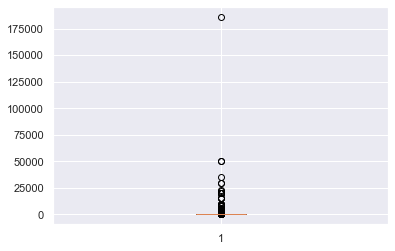

In [44]:
plt.boxplot(donations_data.amount)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9006de700>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9006deca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9006de550>],
 'medians': [<matplotlib.lines.Line2D at 0x1b976c22280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b976c22550>],
 'means': []}

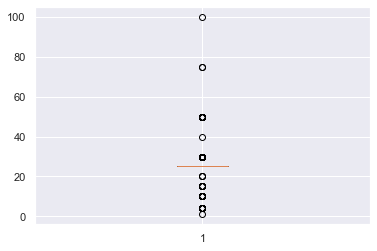

In [43]:
plt.boxplot(pantry_data.amount)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9037daca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b903809160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9037da9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b903809700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9038099d0>],
 'means': []}

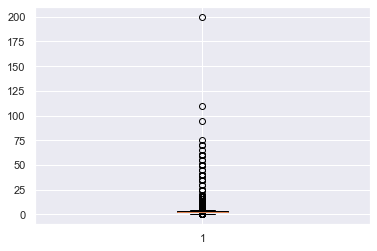

In [40]:
plt.boxplot(volunteer_services_data.appt_duration)

In [41]:
volunteer_services_data.describe()

,anon_ID,rider_num_rides,appt_duration
count,4925.000000,4925.0,4925.000000
mean,329.857462,0.0,3.165279
std,187.983010,0.0,5.648763
min,2.000000,0.0,0.000000
25%,166.000000,0.0,2.000000
50%,297.000000,0.0,2.000000
75%,505.000000,0.0,3.000000
max,641.000000,0.0,200.000000


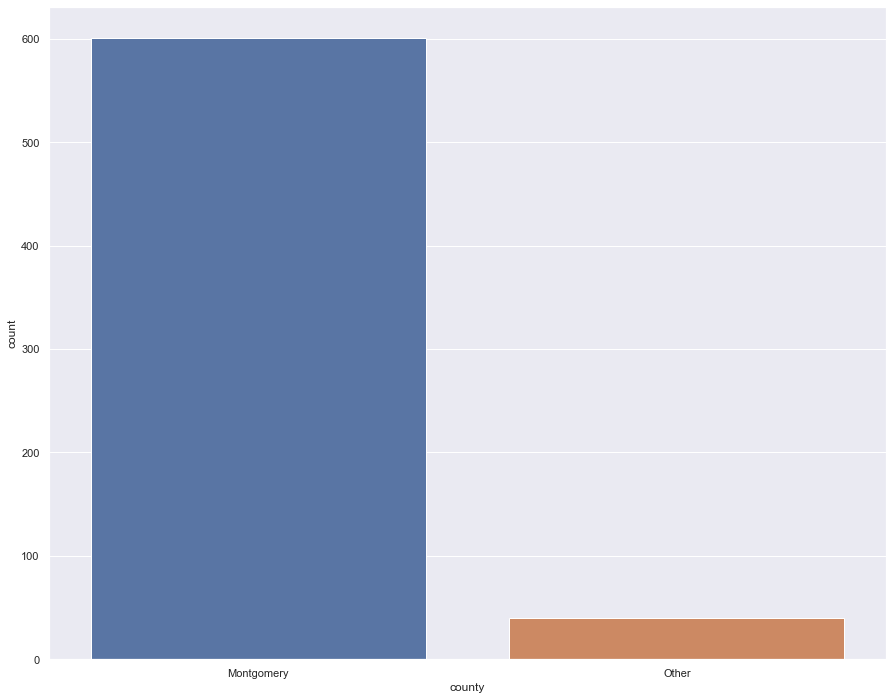

In [27]:
import seaborn as sns
#units_df_min
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="county", data=client_info_data)
# Show Plot
plt.show()

In [7]:
na_df = pd.DataFrame(dataTrain.isna().sum())

In [8]:
na_df

,0
anon_ID,0
assistance_date,0
assistance_category,0
amount,0
unit,0
CommType,7819
Party,7812
InitiatedBy,7842
Benefit_1,8427
Assistance_1,8361


<AxesSubplot:xlabel='index'>

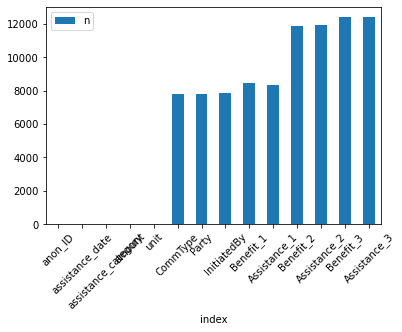

In [9]:
dataTrain.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [10]:
def cat_analyzer(dataframe, variable, target = None):
    print(variable)
    print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe)}), end="\n\n")

In [11]:
catCols = [col for col in dataTrain.columns if dataTrain[col].dtype=="O"]
for i in dataTrain:
    if i in catCols:
        cat_analyzer(dataTrain, i)

assistance_date
                     COUNT     RATIO
2020-05-13 12:30:00     10  0.000801
2020-07-17 16:00:00     10  0.000801
2020-07-22 10:30:00      9  0.000721
2020-04-07 16:00:00      7  0.000561
2020-04-27 11:30:00      6  0.000480
...                    ...       ...
2019-10-15 11:00:00      1  0.000080
2019-10-15 11:20:00      1  0.000080
2019-10-15 11:30:00      1  0.000080
2019-10-15 12:05:00      1  0.000080
2021-09-15 18:05:00      1  0.000080

[10408 rows x 2 columns]

assistance_category
                                           COUNT     RATIO
Remote Contact with client (phone, email)   8736  0.699608
Remote Contact w/o client                   1948  0.156002
Home Visit                                   766  0.061344
Community                                    757  0.060623
Internal Discussions                         233  0.018659
ElderNet Office                               47  0.003764

unit
         COUNT     RATIO
Minutes  12475  0.999039
Dollars     10  0.000801

In [12]:
dataTrain.columns

Index(['anon_ID', 'assistance_date', 'assistance_category', 'amount', 'unit',
       'CommType', 'Party', 'InitiatedBy', 'Benefit_1', 'Assistance_1',
       'Benefit_2', 'Assistance_2', 'Benefit_3', 'Assistance_3'],
      dtype='object')

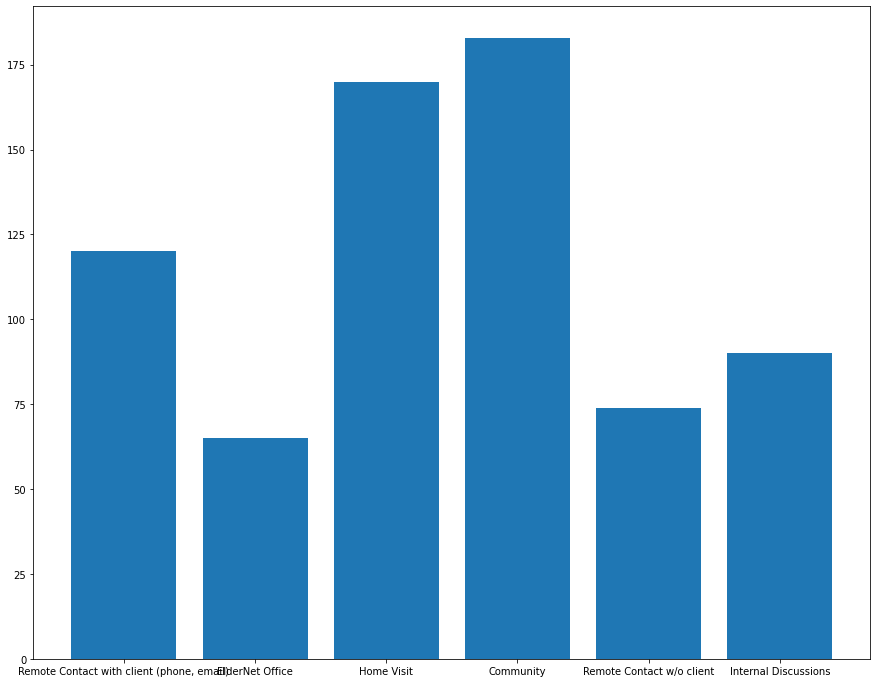

In [21]:
# Figure Size

units_df_min = dataTrain.loc[dataTrain['unit'] == 'Minutes']

#units_df_min
fig = plt.figure(figsize =(15, 12))
 
# Horizontal Bar Plot
plt.bar(units_df_min.assistance_category, units_df_min.amount)
 
# Show Plot
plt.show()

In [16]:
dataTrain.unit

0        Minutes
1        Minutes
2        Minutes
3        Minutes
4        Minutes
          ...   
12482    Minutes
12483    Minutes
12484    Minutes
12485    Minutes
12486    Minutes
Name: unit, Length: 12487, dtype: object